In [ ]:
#downloading the dataset
!wget --no-check-certificate \
"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" 



In [ ]:
!unzip kagglecatsanddogs_5340.zip

In [ ]:
import os
import numpy as np
from shutil import copyfile
import random

root_dir = '/content/PetImages'
catClass = '/Cat'
dogClass = '/Dog'
try:
    os.makedirs(root_dir +'/train' + catClass)
    os.makedirs(root_dir +'/train' + dogClass)
    os.makedirs(root_dir +'/test' + catClass)
    os.makedirs(root_dir +'/test' + dogClass)
except OSError:
    pass

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "/content/PetImages/Cat/"
TRAINING_CATS_DIR = "/content/PetImages/train/Cat/"
TESTING_CATS_DIR = "/content/PetImages/test/Cat/"
DOG_SOURCE_DIR = "/content/PetImages/Dog/"
TRAINING_DOGS_DIR = "/content/PetImages/train/Dog/"
TESTING_DOGS_DIR = "/content/PetImages/test/Dog/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)


666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
img_height = img_width = 100
batch_size = 32

In [ ]:
model = keras.Sequential(
    [
        layers.Input((100, 100, 1)),
        layers.Conv2D(32, 3, padding="same", activation = 'LeakyReLU'),
        layers.Dropout(0.2),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, padding="same", activation = 'LeakyReLU'),
        layers.Dropout(0.2),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation = 'LeakyReLU'),
        layers.Dense(2, activation = 'softmax'),
    ]
)


In [ ]:

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=15,
    zoom_range=0.2,
    shear_range = 0.1,
    horizontal_flip=True,
    data_format="channels_last",
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_gen = train_datagen.flow_from_directory(
    "/content/PetImages/train/",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=True,
    seed=123,
)



test_gen = test_datagen.flow_from_directory(
    "/content/PetImages/test/",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=True,
    seed=123,
)


Found 22499 images belonging to 2 classes.
Found 2499 images belonging to 2 classes.


In [39]:
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["Accuracy"]
  )

In [40]:

history = model.fit(train_gen, epochs=30, steps_per_epoch=90,
                    validation_data=test_gen, validation_steps=6)

Epoch 1/30
90/90 [==============================] - 12s 132ms/step - loss: 0.4405 - Accuracy: 0.7920 - val_loss: 0.8415 - val_Accuracy: 0.6979
Epoch 2/30
10/90 [==>...........................] - ETA: 10s - loss: 0.4081 - Accuracy: 0.8188

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

90/90 [==============================] - 13s 141ms/step - loss: 0.4514 - Accuracy: 0.7847 - val_loss: 0.5700 - val_Accuracy: 0.7812
Epoch 3/30
90/90 [==============================] - 12s 133ms/step - loss: 0.4646 - Accuracy: 0.7750 - val_loss: 0.5727 - val_Accuracy: 0.7865
Epoch 4/30
90/90 [==============================] - 12s 129ms/step - loss: 0.4290 - Accuracy: 0.7948 - val_loss: 0.6135 - val_Accuracy: 0.6979
Epoch 5/30
90/90 [==============================] - 13s 141ms/step - loss: 0.4535 - Accuracy: 0.7913 - val_loss: 0.5251 - val_Accuracy: 0.7812
Epoch 6/30
90/90 [==============================] - 12s 132ms/step - loss: 0.4470 - Accuracy: 0.7910 - val_loss: 0.6005 - val_Accuracy: 0.7760
Epoch 7/30
90/90 [==============================] - 12s 132ms/step - loss: 0.4300 - Accuracy: 0.7969 - val_loss: 0.5046 - val_Accuracy: 0.7396
Epoch 8/30
90/90 [==============================] - 13s 141ms/step - loss: 0.4408 - Accuracy: 0.7931 - val_loss: 0.4959 - val_Accuracy: 0.7917
Epoch 9/30

In [41]:
model.save("model_sun_datagen2.h5")

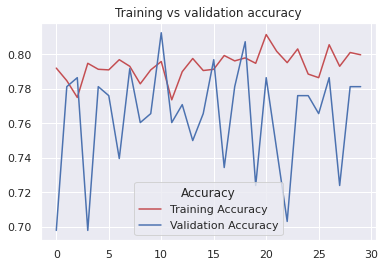

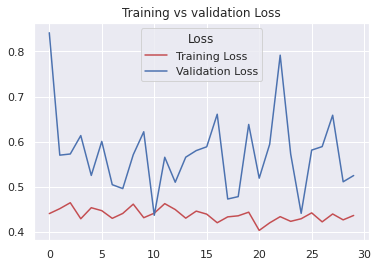

In [42]:
%matplotlib inline
import seaborn as sns
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.set_palette('Set2')

acc=history.history['Accuracy']
val_acc=history.history['val_Accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 


plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.legend(title='Accuracy')
plt.title('Training vs validation accuracy')
plt.show()


plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.legend(title='Loss')

plt.title('Training vs validation Loss')
plt.show()

